# EM analysis Experimenting

#### Run this at the beginning of every notebook

In [436]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### importing data and reading in CSV 

In [437]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/chimi_clean_contingencies_only_parsed_data.csv')

#### pulling out only the first epoch of the first day, plus other experimenting code

In [451]:
#df.index = #RangeIndex(start=0, stop=10115, step=1)
#df.columns =Index([u'Unnamed: 0', u'leaf', u'stem', u'reward', u'contingency', u'date',
       #u'session', u'trial'],
     # dtype='object')
#df.columns[1] = leaf
# df.dtypes
# Unnamed: 0      int64
# leaf            int64
# stem           object
# reward          int64
# contingency     int64
# date            int64
# session         int64
# trial           int64
# dtype: object
firstday_firstsesh = df[(df['session'] == 1) & (df['date'] == 20200213)]
#first
firstday_firstsesh 
         # ->>> Uncomment above if you wanna see table
#okay so i finally figured out how to index and pull out only rows where col = specific things. 
#Made a plot of leaves visited but need to figure out how to add axis titles/beautify. 

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0,4,B,1,805020802050,20200213,1,0
1,1,3,B,1,805020802050,20200213,1,1
2,2,1,A,1,805020802050,20200213,1,2
3,3,2,A,0,805020802050,20200213,1,3
4,4,1,A,1,805020802050,20200213,1,4
5,5,6,C,1,805020802050,20200213,1,5
6,6,5,C,0,805020802050,20200213,1,6
7,7,6,C,1,805020802050,20200213,1,7
8,8,5,C,0,805020802050,20200213,1,8
9,9,3,B,0,805020802050,20200213,1,9


## Plotting!

Text(0,0.5,'leaf visited')

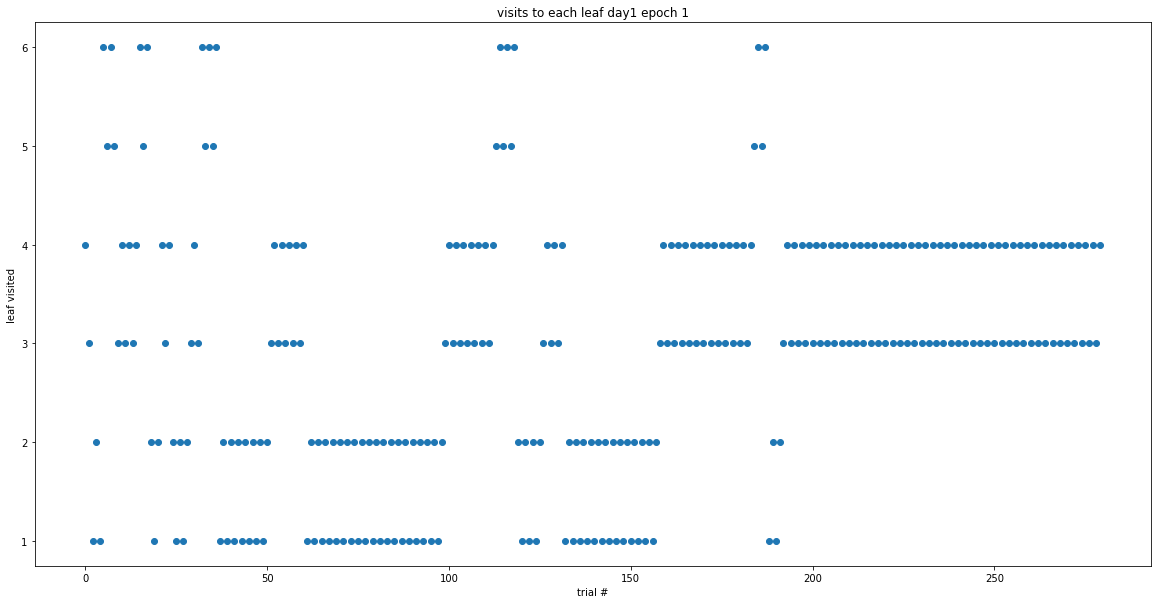

In [439]:
plt.scatter(firstday_firstsesh[firstday_firstsesh.columns[0]], firstday_firstsesh[firstday_firstsesh.columns[1]])
plt.title("visits to each leaf day1 epoch 1")
plt.xlabel("trial #")
plt.ylabel("leaf visited")

In [241]:
# This cell will plot 2 things on top of eachother, plots a different way with ax
#figure, ax1 = plt.subplots() 
# ax1.plot(df[df.columns[0]],df[df.columns[1]],linewidth=0.5,zorder=1,label="Force1")
# #ax1.plot(df[df.columns[0]],df[df.columns[2]],linewidth=0.5,zorder=1, label = "Force2")

In [242]:
#This cell will currently plot all stems visited on every day, every epoch with X's
#plt.scatter(df[df.columns[0]], df[df.columns[1]], linewidth=.5, marker = "x" )

### Finding how many trials spent at each stem 

In [440]:
num_trials_A = firstday_firstsesh [(firstday_firstsesh['stem'] == 'A')]
num_trials_B = firstday_firstsesh [(firstday_firstsesh['stem'] == 'B')]
num_trials_C = firstday_firstsesh [(firstday_firstsesh['stem'] == 'C')]
A = len(num_trials_A)
B = len(num_trials_B)
C = len(num_trials_C)
print(A + B + C)

280


Text(0,0.5,'num visits')

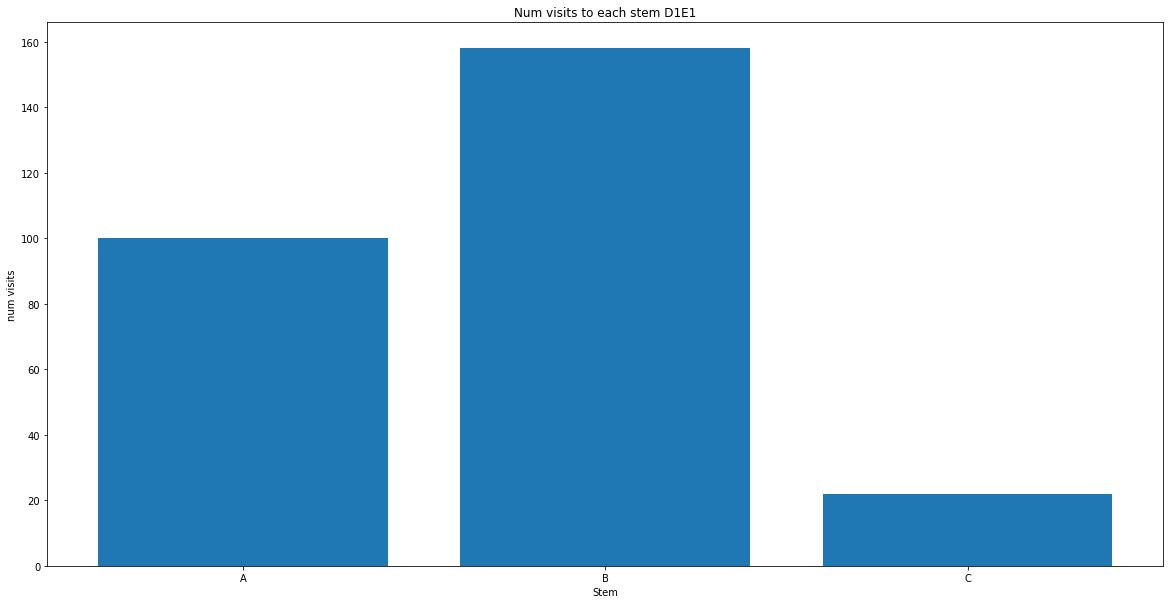

In [441]:
stems = ['A', 'B', 'C']
visits = [A, B, C]
plt.bar(stems, visits)
plt.title('Num visits to each stem D1E1')
plt.xlabel('Stem')
plt.ylabel('num visits')

### Finding num rewards at each stem

165


Text(0,0.5,'num rew')

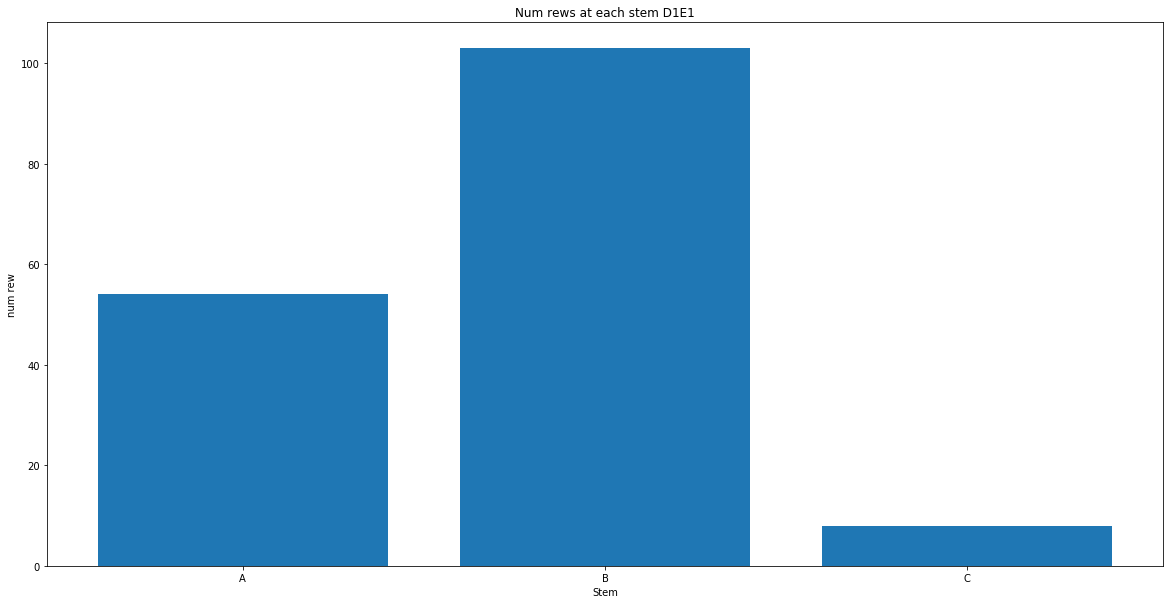

In [442]:
num_rews_A = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'A')]
num_rews_B = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'B')]
num_rews_C = firstday_firstsesh [(firstday_firstsesh['reward'] == 1) & (firstday_firstsesh['stem'] == 'C')]
rA = len(num_rews_A)
rB = len(num_rews_B)
rC = len(num_rews_C)
print(rA + rB + rC)

stems = ['A', 'B', 'C']
rewards = [rA, rB, rC]
plt.bar(stems, rewards)
plt.title('Num rews at each stem D1E1')
plt.xlabel('Stem')
plt.ylabel('num rew')

### Playing with for loops

In [443]:
# A = []
# B = 0
# C = 0
# for i in range(len(firstday_firstsesh)):
#     #print(df.iloc[i,0], df.iloc[i,2])
#     if firstday_firstsesh.iloc[i,2] == 'A':
#         A[] = firstday_firstsesh[i,3]
                 
#          #A = A +1          
#     if firstday_firstsesh.iloc[i,2] == 'B':
#          B = B +1  
#     if firstday_firstsesh.iloc[i,2] == 'C':
#          C = C +1        



## rew rate calculation

### rew rate all (rew) and only first part(rew_smaller) for plot


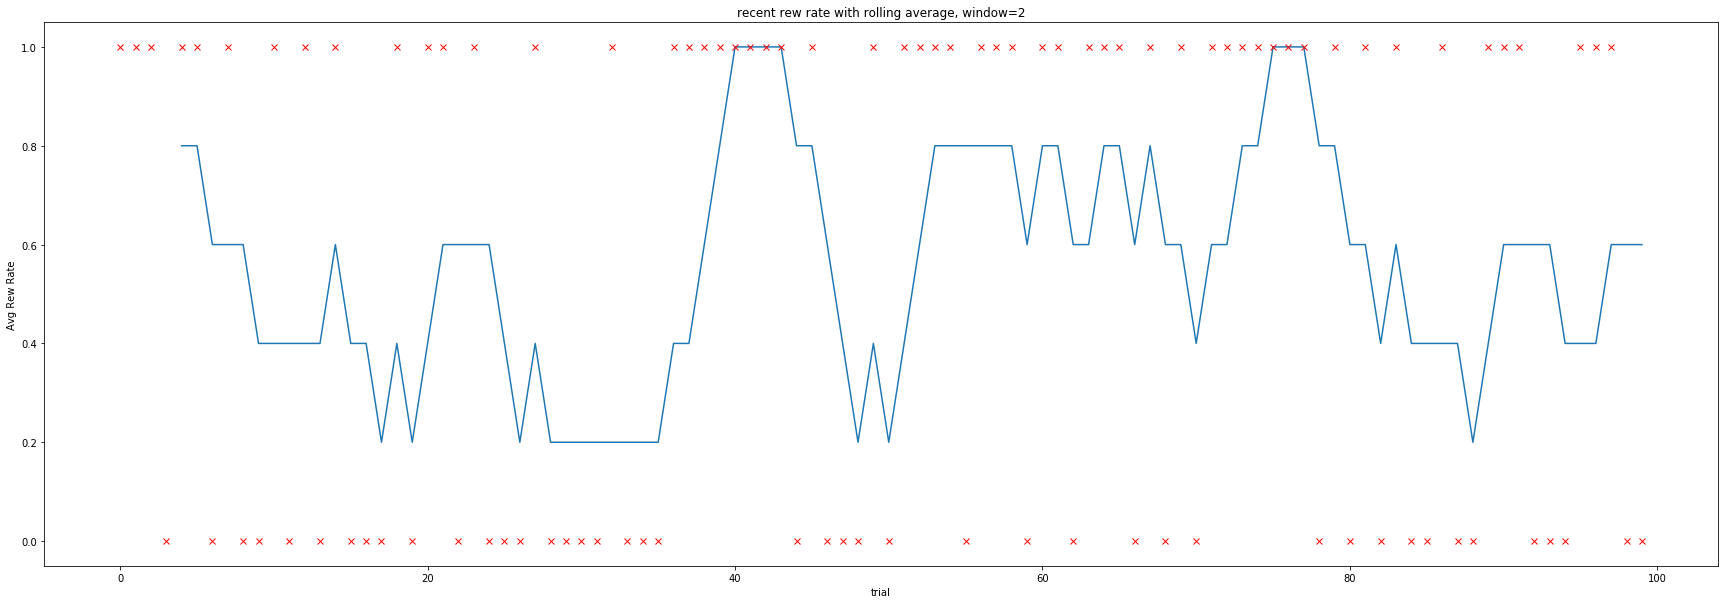

In [445]:
rew = firstday_firstsesh.iloc[ :, 3]
rew_smaller = firstday_firstsesh.iloc[ :100, 3]
#rew_all = firstday_firstsesh.iloc[]
rew_rate = rew_smaller.rolling(window=5).mean()
plt.plot(rew_rate, label = 'avg rew rate')
plt.plot(rew_smaller, 'rx', label = 'reward=binary')
plt.title("recent rew rate with rolling average, window=2")
plt.xlabel("trial")
plt.ylabel("Avg Rew Rate")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (30,10)

### Adding column of rew rate to firstday_firstsesh

In [454]:
rew_rate_all = rew.rolling(window=10).mean()
#rew_rate_all = pd.DataFrame(rew_rate_all)
firstday_firstsesh['Rew_rate'] = rew_rate_all
firstday_firstsesh

/home/emonroe/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,Rew_rate
0,0,4,B,1,805020802050,20200213,1,0,NaN
1,1,3,B,1,805020802050,20200213,1,1,NaN
2,2,1,A,1,805020802050,20200213,1,2,NaN
3,3,2,A,0,805020802050,20200213,1,3,NaN
4,4,1,A,1,805020802050,20200213,1,4,NaN
5,5,6,C,1,805020802050,20200213,1,5,NaN
6,6,5,C,0,805020802050,20200213,1,6,NaN
7,7,6,C,1,805020802050,20200213,1,7,NaN
8,8,5,C,0,805020802050,20200213,1,8,NaN
9,9,3,B,0,805020802050,20200213,1,9,0.6


### calculate rew rates @ each stem


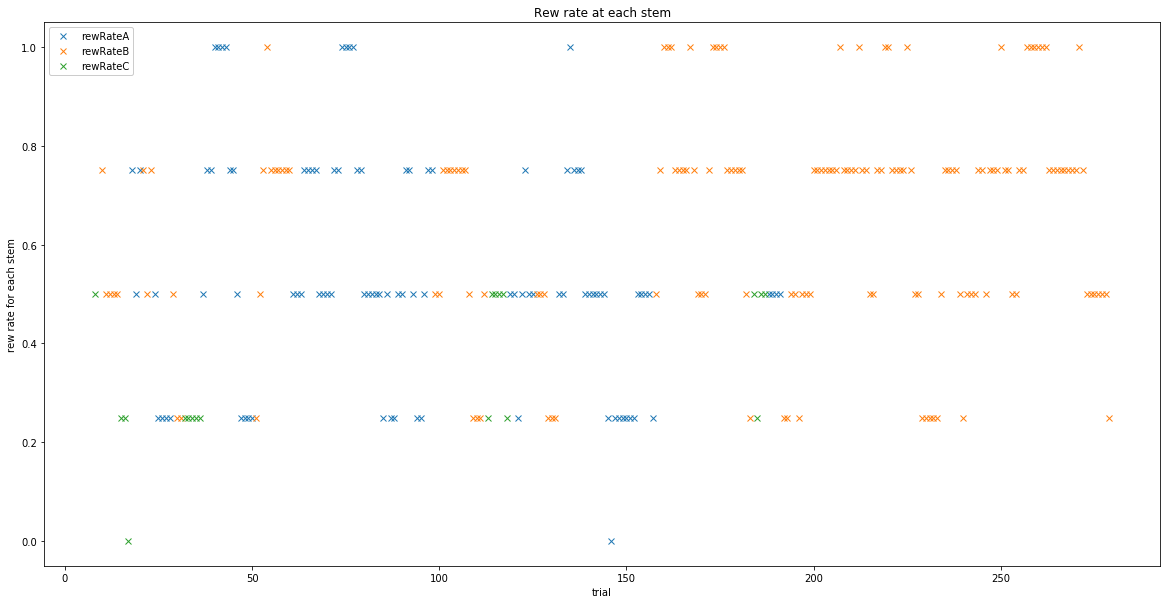

In [515]:
firstday_firstsesh.rew_rate_A = ''
firstday_firstsesh.rew_rate_B = ''
firstday_firstsesh.rew_rate_C = ''



rewA = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='A']['reward']
rew_rateA = rewA.rolling(window=4).mean()
firstday_firstsesh[firstday_firstsesh.stem =='A', 'rew_rate_A'] = rew_rateA
rewB = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='B']['reward']
rew_rateB = rewB.rolling(window=4).mean()
firstday_firstsesh[firstday_firstsesh.stem =='B', 'rew_rate_B'] = rew_rateB
rewC = firstday_firstsesh.loc[firstday_firstsesh['stem'] =='C']['reward']
rew_rateC = rewC.rolling(window=4).mean()
firstday_firstsesh[firstday_firstsesh.stem =='C', 'rew_rate_C'] = rew_rateC





#Plotting each of these overlayed which looks awful i know, thinking about a more relevent way to visualize 
plt.plot(rew_rateA, 'x', label = "rewRateA")
plt.plot(rew_rateB, 'x', label = "rewRateB")
plt.plot(rew_rateC, 'x', label = "rewRateC")

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (40,10)
plt.title('Rew rate at each stem')
plt.xlabel('trial')
plt.ylabel('rew rate for each stem')
plt.legend(framealpha=1, frameon=True)



## Splitting up contingenices, finding most rewarded

In [468]:
c1 = firstday_firstsesh[(firstday_firstsesh['contingency'] == 805020802050)]
c2 = firstday_firstsesh[(firstday_firstsesh['contingency'] == 205080508020)]

rew_leaf1 = 0
rew_leaf2 = 0
rew_leaf3 = 0
rew_leaf4 = 0
rew_leaf5 = 0
rew_leaf6 = 0

for leaf in range(len(c1)):
    if c1.iloc[leaf, 1] == 1:
        if c1.iloc[leaf, 3] == 1:
            rew_leaf1= rew_leaf1 + 1
    elif c1.iloc[leaf, 1] == 2:
        if c1.iloc[leaf, 3] == 1:
            rew_leaf2= rew_leaf2 + 1
    elif c1.iloc[leaf, 1] == 3:
        if c1.iloc[leaf, 3] == 1:
            rew_leaf3= rew_leaf3 + 1
    elif c1.iloc[leaf, 1] == 4:
        if c1.iloc[leaf, 3] == 1:
            rew_leaf4= rew_leaf4 + 1
    elif c1.iloc[leaf, 1] == 5:
        if c1.iloc[leaf, 3] == 1:
            rew_leaf5= rew_leaf5 + 1
    elif c1.iloc[leaf, 1] == 6:
        if c1.iloc[leaf, 3] == 1:
            rew_leaf6= rew_leaf6 + 1
rew_leaves_c1 = (rew_leaf1, rew_leaf2, rew_leaf3, rew_leaf4, rew_leaf5, rew_leaf6)                                        
print("the number of rewards at leaf 1 is %d"  % rew_leaf1)
print("the number of rewards at leaf 2 is %d"  % rew_leaf2)
print("the number of rewards at leaf 3 is %d"  % rew_leaf3)
print("the number of rewards at leaf 4 is %d"  % rew_leaf4)
print("the number of rewards at leaf 5 is %d"  % rew_leaf5)
print("the number of rewards at leaf 6 is %d"  % rew_leaf6)

the number of rewards at leaf 1 is 30
the number of rewards at leaf 2 is 16
the number of rewards at leaf 3 is 6
the number of rewards at leaf 4 is 19
the number of rewards at leaf 5 is 0
the number of rewards at leaf 6 is 6


In [ ]:
#how does the recent reward rate (predict, relate to) the number of recent visits to each stem? 